# Variables, Expressions, Statements, & Comments

*Variables* are **names that point to objects in memory**.

*Expressions* are **combinations of variables and operators**.

*Statements* are commands that **"do" something** and **have side effects**. They usually work on or with expressions.

*Comments* are **prose** supporting a **human's understanding** of the program.

## Variables / Names

Variables are created by a so-called **assignment statement** (Note that the assignment statement can also be used in a context where it does not create a new name).

In [1]:
a = 20.0
b = 789

When referenced, a name just evaluates to its value.

In [2]:
a

20.0

A name can be **re-assigned** as often as we wish. Thereby, we could also assign an object of a different type. Because this is allowed, Python is said to be a **dynamically typed** language. On the contrary, a **statically typed** language like C also allows re-assignment but only with objects of the same type. This subtle distinction is one reason why Python is slower at execution than C. But as mentioned before, this can be mitigated with 3rd party libraries.

In [3]:
a = 20

In [4]:
a

20

When we want to re-assign a name while referencing its old (= current) value, we can also **update** it using a so-called **augmented assignment operator**. This implicitly inserts in the current value as the first token on the right-hand side.

In [5]:
a *= 4  # same as a = a * 4

In [6]:
a //= 2  # same as a = a // 2, "//" to retain the integer type

In [7]:
a += 2  # same as a = a + 2

In [8]:
a

42

Names can be de-referenced (= "deleted") with the `del` statement.

In [9]:
del b

If we refer to an unknown name, a runtime exception occurs.

In [10]:
b

NameError: name 'b' is not defined

Some names magically exist when we start Python. In this introductory tutorial, we can ignore such variables.

In [11]:
__name__

'__main__'

To see all defined names, the built-in function [dir()](https://docs.python.org/3/library/functions.html#dir) is helpful.

In [12]:
dir()

['In',
 'Out',
 '_',
 '_11',
 '_2',
 '_4',
 '_8',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'a',
 'exit',
 'get_ipython',
 'quit']

It is important to understand that **several** names can point to the **same** object in memory. This can be counter-intuitive in the beginning.

This makes `b` point to whatever `a` points to.

In [13]:
b = a

For simple types like integers or floats this will never cause confusion.

Let's change the value of `a`.

In [14]:
a = 123

In [15]:
a

123

`b` is still the same as before.

In [16]:
b

42

However, if a name points to an object of a more "complex" type (e.g., a list), "weird" things can happen.

In [17]:
x = [1, 2, 3]

In [18]:
y = x

Let's change the first element of `x`. A later notebook will discuss lists in more depth. For now, let's just treat the brackets `[...]` as just another operator, called the **indexing operator**.

In [19]:
x[0]

1

As noted above, this is a case where the assignment operator does not create a new name. To be precise, it assigns a new value to a "part" of an object, which is an example of changing an object's state.

In [20]:
x[0] = 99

In [21]:
x

[99, 2, 3]

The changes made to `x` can also be seen through the `y` pointer.

In [22]:
y

[99, 2, 3]

The illustrated difference in behavior has to do with the fact that integers and floats are **immutable** objects while lists are **mutable**.

In the first case, an object cannot be changed once it is created. When we assigned $123$ to `a`, we actually do not change the current value of `a` but create a new integer object in memory and make `a` point to it, while the `b` reference is not affected.

In the second case, `x[0]` assigns the integer $99$ to the first element of the `x` list but does actually not create a new name.

In general, the assignment statement (re-)creates a name and makes it point to whatever object is on the right-hand side if the left-hand side is a pure name. Otherwise, it changes some object on the left-hand side.

In the beginning, visualizing the memory with a tool like [PythonTutor](http://pythontutor.com/visualize.html#code=x%20%3D%20%5B1,%202,%203%5D%0Ay%20%3D%20x%0Ax%5B0%5D%20%3D%2099%0Adel%20x,%20y%0Ax%20%3D%20%5B1,%202,%203%5D%0Ay%20%3D%20x.copy%28%29%0Ax%5B0%5D%20%3D%2099&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) will assist in understanding what is going on.

### Naming Conventions

> "There are two hard problems in computer science: naming things and cache invalidation ... and off-by-one errors."

Variable names can contain upper and lower case letters, numbers, and underscores ("\_") and be as long as we want. However, they must not begin with a number. Also, they must not be any of Python's **[keywords](https://docs.python.org/3/reference/lexical_analysis.html#keywords)**.

Variable names are usually chosen such that they do not need any more documentation and are self-explanatory. A very common convention is to use so-called **snake\_case**, i.e. keep everything lowercase and use underscores to seperate words.

See this [link](https://en.wikipedia.org/wiki/Naming_convention_%28programming%29#Python_and_Ruby) for a comparison of different naming conventions.

Good examples:

In [23]:
pi = 3.14

In [24]:
answer_to_everything = 42

In [25]:
my_name = "Alexander"

In [26]:
work_address = "Burgplatz 2, Vallendar"

Bad examples:

In [27]:
PI = 3.14  # unless used as a "global" constant

In [28]:
answerToEverything = 42  # this is a style used in languages like Java

In [29]:
name = "Alexander"  # name of what ?

In [30]:
address@work = "Burgplatz 2, Vallendar"

SyntaxError: can't assign to operator (<ipython-input-30-dfc191b6a91a>, line 1)

If a variable name collides with a built-in name, just add a trailing underscore.

In [31]:
type_ = "student"

Variables with leading and trailing double underscores (referred to as **dunder** in Python "slang") are used for important built-in variables. Do not use this style for custom variables!

In [32]:
__name__

'__main__'

### The big Picture

This PyCon talk by [Ned Batchelder](https://nedbatchelder.com/) (software engineer at [edX](https://www.edx.org/) and organizer of the [Python User Group](https://www.meetup.com/bostonpython/) in Boston) summarizes all situations where some sort of variable assignment is done in Python. The content is intermediate and therefore it is ok if you do not understand everything at this point. However, the contents should be known by everyone claiming to be a Pythonista.

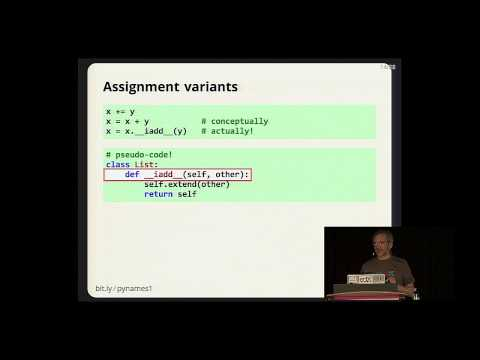

In [33]:
from IPython.display import YouTubeVideo
YouTubeVideo("_AEJHKGk9ns", width="60%")

## Expressions

Expressions are any syntactically correct combinations of variables (that then evaluate to their values) with operators. See the [language reference](https://docs.python.org/3/reference/expressions.html) for a full list.

In simple words, anything that can be used on the right-hand side of an assignment statement.

In [34]:
a + b

165

In [35]:
(a + b) ** 3

4492125

As before, the bracket operator `[...]` can be used for indexing.

In [36]:
y[2]

3

Simple parenthesis are also considered to be an operator, called the **call** operator `(...)`.

In [37]:
sum(x)

104

Python **overloads** certain operators. For example you can not only add numbers but also strings (called **string concatenation**).

In [38]:
greeting = "Hi "
audience = "class"

In [39]:
greeting + audience

'Hi class'

Duplicate strings using multiplication.

In [40]:
b * greeting

'Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi '

## Statements

Statements are anything that changes the state of the program's memory or has another side effect. Statements do not just evaluate to a value like expressions; instead, they create or change values. See the [language reference](https://docs.python.org/3/reference/simple_stmts.html) for a full list.

Most notably of course are the assignment and `del` statements.

In [41]:
a = 123

The [print()](https://docs.python.org/3/library/functions.html#print) function can be regarded as a "statement" as well. In fact, it used to be a real statement in Python 2 and has all the necessary properties.

In [42]:
print("I change the display of the computer")

I change the display of the computer


## Comments

We can use the `#` symbol to write comments in plain English right into the code.

As a good practice, comments should not describe what happens (this should be evident by reading the code, otherwise it is most likely badly written code) but why something happens.

Comments can be either added at the end of a line of code (by convention seperated with two spaces) or be on a line on their own.

In [43]:
distance = 891  # in meters
elapsed_time = 93  # in seconds
# Calculate the speed in km/h.
speed = 3.6 * distance / elapsed_time

But let's think wisely if we really need to use a comment.
The second cell is a lot more "Pythonic".

In [44]:
seconds = 365 * 24 * 60 * 60  # = seconds in the year

In [45]:
seconds_per_year = 365 * 24 * 60 * 60